#Contexto e objetivo

Segundo o infomoney, apenas no Brasil houve um aumento de 32,7% de tentativas de fraudes em e-commerce apenas no primeiro semestre de 2021, se em comparaçaõ com o mesmo período do ano anterior, segundo o Mapa da Fraude, um estudo da consultoria Clearsale, foram 2,6 milhões de tentativas de fraude no primeiro semestre de 2021, considerando o total de 182 milhões de transações via cartão de crédito. 

(fonte: https://www.infomoney.com.br/minhas-financas/brasil-teve-alta-de-quase-33-nas-tentativas-de-fraude-com-cartao-de-credito-no-1-semestre-mostra-estudo/)


Dentro do contexto apresentado, este pequeno projeto tem por objetivo detectar movimentações por meio de um algoritmo preditivo com um bom índice de assertividade na classificação de transações, em fraudulentas ou nao fraudulentas.

Situações indesejadas no contexto "Transação X é uma fraude?":

1 (Falso Positivo) - Não se deseja "incomodar" o cliente interrompendo uma transação real (Classificar como fraude, uma transação real).

2 (Verdadeiro Positivo) - Não deixar que aconteça uma fraude real.

#Dados

Os dados foram retirados da seguinte competição realizada pela kaggle:

**Credit Card Fraud Detection**

*Anonymized credit card transactions labeled as fraudulent or genuine*

Link - https://www.kaggle.com/mlg-ulb/creditcardfraud

#Entendendo o problema de negócio


- O modelo de aprendizado aplicado é o supervisionado de classificação, no qual o algoritmo aprende com dados usados para treinamento com os quais já se sabe a solução e busca aprender a rotular corretamente novas entradas de dados a partir da experiência anterior de treinamento.

- O dataset contém transações reais realizadas por cartões de crédito, que ocorreram em apenas dois dias de setembro de 2013, por clientes europeus. 

- O conjunto de dados contém 492 fraudes em um total de 284.807 transações, é possível perceber o desequilíbrio entre a classe positiva(é fraude) e a classe negativa(não é fraude), sendo a positiva responsável por um total de 0.172% de todas as transações.

- As variáveis tem natureza numérica, resultantes de uma transformação PCA(Principal Component Analysis), (um procedimento matemático que utiliza uma transformação ortogonal (ortogonalização de vetores) para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis linearmente não correlacionadas chamadas de componentes principais - Fonte: Wikipédia). Tal transformação é Utilizada quando se possui um dataset de alta dimensionalidade (muitas variáveis), assim foram gerados 28 atributos derivados a partir dos atributos originais obtidos, os únicos atributos nao transformados com o PCA são "Tempo" e "Quantidade".

- Por questões de confidencialidade, não foram fornecidos os recursos e informações originais sobre os dados.

- O recurso "Tempo" contém os segundos decorridos entre cada transação e a primeira transação do conjunto de dados. O recurso "Amount" é o valor em dinheiro da transação.

- O recurso "Classe" é a nossa variavel resposta, assumindo 1 em caso de fraude e 0 caso contrário.

# Análise Exploratória dos Dados

In [1]:
#Importando bibliotecas

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
#Lendo os dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Detecção de Fraude - Cartão de crédito/creditcard.csv')

In [3]:
#Visualizando primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Informações sobre atributos
#284.807 entradas
#31 colunas(variáveis), sendo 30 atributos e 1 classe de saída
#Tipo dos dados é numéricos
#Não há valores nulos (todos são "non-null")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Verificando se há valores missing(faltantes), por mais que o df.info() já tenha dado a resposta.
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
#Caso houvessem valores missing e houvesse necessidade de eliminação dos mesmos:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


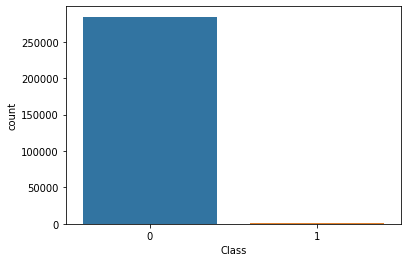

In [6]:
#Observando a variável Target(Class)
df['Class'].value_counts()
sns.countplot(df['Class'])

É visualmente perceptível o desbalanceamento entre as classes, um tratamento se faz necessário.

0 - Sem Fraude

1 - Com Fraude

In [7]:
#Explorando correlações entre atributos com o Target.
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

Além de Class, que óbviamente possui 100% de correlação com ela mesma, temos as classes V11, V4 e V2 com maiores índices de correlação.(Quando uma acontecer, a outra tem mais chances de ocorrer) e V12, V14 e V17 com maiores índices de correlação negativa.

OBS: correlação não implica causalidade

In [8]:
#Estatísticas descritivas
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Pré-Processamento dos dados

Comumente esta é a etapa mais longa dentro do ciclo de dados, porém os conjuntos de dados deste dataset, obtido no desafio da Kaggle, estão limpos em sua maioria. No mundo real os dados são encontrados "bagunçados" e incompletos, e sem saber até mesmo se aquele resultado faltante tem algum significado específico, torna-se mais complexo tomar decisões sobre quais dados serão mantidos e quais serão limpos. É necessário ter domínio do negócio e do contexto, pois cada decisão tomada nessa etapa afeta a predição do nosso algoritmo.

Em nosso caso, outliers(pontos fora da curva) podem significar os casos críticos que desejamos capturar, em outros projetos pode ser apenas mais um dado que atrapalha mais do que ajuda.

###Dados duplicados

In [9]:
# Verificando e removendo valores duplicados
duplicate = df[df.duplicated()]
duplicate

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


O dataset possue 1,081 registros duplicados.

In [10]:
#Removendo a segunda ocorrência de cada duplicata
df.drop_duplicates(inplace=True)

In [11]:
#Checando se ainda existem duplicatas
duplicate = df[df.duplicated()] 
duplicate

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


Checando se há mudança de correlação após retirada dos dados duplicados:

In [12]:
#Explorando correlações entre atributos com o Target, parte 2.
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

Tudo OK

###Desequilíbrio entre classes

In [13]:
df.query('Class == 0')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
df.query('Class == 1')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


Como vimos anteriormente, há uma diferença enorme entre a quantidade de dados de classe 0(Normal) e de classe 1(Fraude), removendo as duplicatas encontramos os seguintes números:

**0 - 283253 rows**

 **1 - 473 rows**

Um método para a solução deste problema é o SMOTE, e o que é o SMOTE?

Segundo este artigo: 

*https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688*

Smote atua sob a estratégia de criar uma amostra sintética a partir da amostra real, citando literalmente o artigo: 

"O SMOTE funciona selecionando pares de observações de classes minoritárias e, em seguida, criando um ponto sintético que fica na linha que conecta essas duas. É bastante liberal quanto à seleção de pontos minoritários e pode acabar pegando pontos minoritários que são discrepantes."

Claramente o universo ideal é ter dados suficientes em ambas as classes para que não haja a necessidade desse tipo de solução, porém o desequilíbrio de classe é um problema frequente, manifestado na detecção de fraude, detecção de intrusão, detecção de atividade suspeita dentre outros.

In [15]:
# Separando o dataset em sets de treino e de teste.

X = df.iloc[:, :-1].to_numpy()
y = df['Class'].to_numpy()

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

Podemos perceber que sim, a existência de dados duplicados afetada a relação estatística entre as variáveis e o Target.

In [29]:
#Separando dados para treinamento e teste, com 20% de amostra de teste, e random state 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [32]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (453204, 30)
X_test: (113302, 30)
y_train: (453204,)
y_test: (113302,)


#Criando Máquina preditiva

- Nessa etapa será criada a máquina preditiva e ajustado o modelo.

- Será feita a classificação dos dados.

- Por fim o desempenho do modelo será avaliado seguindo métricas de classificação.

In [75]:
#Costruindo o modelo utilizando o algoritmo de Random Forest Classifier

model = RandomForestClassifier()


In [76]:
#Treinando o modelo
#Talvez demore alguns minutos
model = model.fit(X_train, y_train)

In [77]:
#Passando novos dados de teste para avaliação do modelo.
y_pred = model.predict(X_test)

In [78]:
#Comparando classes reais com as classes previstas pelo modelo.
compare = pd.DataFrame({'Val_Reais': y_test,'Val_Previstos':y_pred})
compare

,Val_Reais,Val_Previstos
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
113297,1,1
113298,0,0
113299,0,0
113300,0,0


In [79]:
#Evaluando modelo
print("Classification metrics: \n", classification_report(y_test, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       1.00      1.00      1.00     56640

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



Text(0.5, 1.0, 'Confusion Matrix')

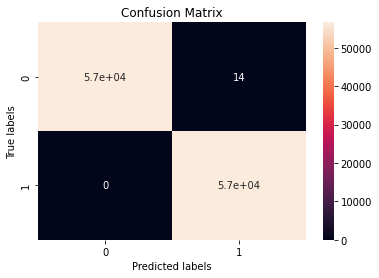

In [80]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

**Observação**: O resultado foi muuuuuuuito próximo da perfeição, o que indica que deve haver um erro, aparentemente o SMOTE feito dessa maneira (Usando a mesma quantidade de fraudes e não fraudes) afeta o modelo e talvez o faça decorar os valores. Maior estudo é requerido... Para nota de comparação, fazer o mesmo modelo sem SMOTE:


##Refazendo sem SMOTE

In [81]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Detecção de Fraude - Cartão de crédito/creditcard.csv')

In [82]:
df2.drop_duplicates(inplace=True)

In [83]:
X2 = df2.iloc[:, :-1].to_numpy()
y2 = df2['Class'].to_numpy()

In [84]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 7)

In [85]:
print("X_train:", X2_train.shape)
print("X_test:", X2_test.shape)
print("y_train:", y2_train.shape)
print("y_test:", y2_test.shape)

X_train: (226980, 30)
X_test: (56746, 30)
y_train: (226980,)
y_test: (56746,)


In [86]:
model2 = model.fit(X2_train, y2_train)

In [87]:
y2_pred = model.predict(X2_test)

In [88]:
compare2 = pd.DataFrame({'Val_Reais': y2_test,'Val_Previstos':y2_pred})
compare2

,Val_Reais,Val_Previstos
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
56741,0,0
56742,0,0
56743,0,0
56744,0,0


In [89]:
print("Classification metrics: \n", classification_report(y2_test, y2_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.76      0.82        90

    accuracy                           1.00     56746
   macro avg       0.95      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Text(0.5, 1.0, 'Confusion Matrix')

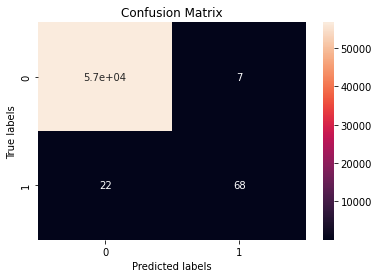

In [90]:
cm = confusion_matrix(y2_test, y2_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Percebemos que os valores de métricas para não-fraudes é quase 100%, porém os mesmos, quando relacionados às fraudes, tem um índice de 91% de precisão, 76% de recall e 82% de f1-score, que basicamente é a harmônica das duas primeiras. Bem diferente do mesmo caso com SMOTE, é interessante refazer o mesmo projeto com diferentes algoritmos de ML no futuro, para fazer comparações.

Importante também notar que a métrica mais considerável para o nosso caso é o Recall pois é ele que descreve os falsos negativos. O desafio de negócios primário deste caso é minimizar a ocorrência de fraudes percebidas como transações comuns, ou seja, falsos negativos. Mesmo que seja gerado um problema secundário, que seria o incômodo para o cliente ter sua transação tomada como fraude, a mesma poderia ser resolvida por meios diversos, como adoção de uma nova camada de autenticação, mesmo que temporária para aquela transação específica, ou uma comunicação direta para com o cliente, visto que os falsos positivos ocorrem em frequências muito baixas. Enquanto o problema de fraude é muito mais complicado de ser resolvido uma vez que ocorreu.